## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [3]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df = df[(df['WaveNumber'] >= 400) & (df['WaveNumber'] <= 1800)].reset_index()

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [6]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SpecID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], distance=50, prominence=6, width=6)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [7]:
weights['widths']

array([134.11888914,  24.20060399,  33.98318381,  83.73538968,
       104.04847287,  49.21993166,   9.53477332,  62.7423805 ,
        21.85112743, 152.45588517,  17.02055569,  30.42055589,
       133.14114612,  23.89262959,  80.49165976])

In [8]:
print(len(peaks))

52109


Below shows a scatterplot of the coordinates of all the peaks we have found

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

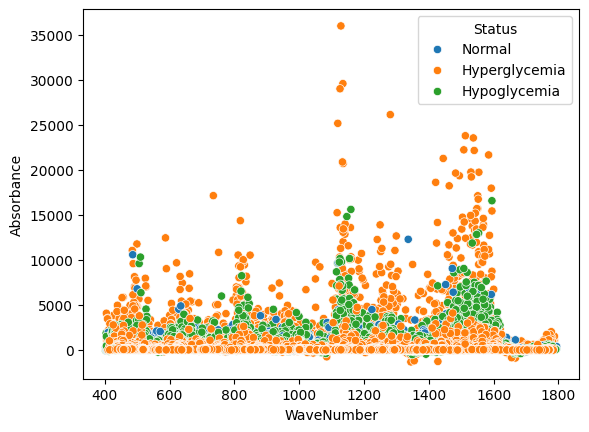

In [9]:
sns.scatterplot(data=df.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", hue="Status")

We then add the peak information to our main dataframe

In [10]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

C:\Users\stang\AppData\Local\Temp\ipykernel_11132\2901317241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Widths'] = widths
C:\Users\stang\AppData\Local\Temp\ipykernel_11132\2901317241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Prominences'] = prom


In [11]:
peak_df

,index,SpecID,Seq,WaveNumber,SurID,Status,Absorbance,Widths,Prominences
96,389,201210-1-00,389,465.83142,201210-1,Normal,54.866643,72.606738,47.322760
182,475,201210-1-00,475,524.60138,201210-1,Normal,27.249634,20.976130,8.277837
252,545,201210-1-00,545,572.43738,201210-1,Normal,24.281960,10.377739,6.875839
317,610,201210-1-00,610,616.85651,201210-1,Normal,130.660198,55.638128,127.961246
433,726,201210-1-00,726,696.12756,201210-1,Normal,155.171518,44.976049,156.359133
...,...,...,...,...,...,...,...,...,...
6228219,8009366,210526-3-49,1601,1294.07740,210526-3,Hyperglycemia,32.159583,17.020556,6.197960
6228348,8009495,210526-3-49,1730,1382.23230,210526-3,Hyperglycemia,30.246198,30.420556,12.254316
6228439,8009586,210526-3-49,1821,1444.41920,210526-3,Hyperglycemia,33.353996,133.141146,32.856307
6228504,8009651,210526-3-49,1886,1488.83830,210526-3,Hyperglycemia,10.608297,23.892630,9.838491


We then use the function to assign each peak we have found to a grid slot. We have speicified the slot sizes as they give a meaningful overlap to build our graph

In [12]:
def assign_to_grid(x, y, x_slot_size, y_slot_size):

    x_index = int(x / x_slot_size)
    y_index = int(y / y_slot_size)

    return x_index, y_index

In [13]:
# Set the size of the grid slots
WaveNumber_slot_size = 25
Absorbance_slot_size = 50

peak_df['GridSlot'] = peak_df.apply(lambda row: assign_to_grid(row['WaveNumber'], row['Absorbance'], WaveNumber_slot_size, Absorbance_slot_size), axis=1)

C:\Users\stang\AppData\Local\Temp\ipykernel_11132\2448990994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['GridSlot'] = peak_df.apply(lambda row: assign_to_grid(row['WaveNumber'], row['Absorbance'], WaveNumber_slot_size, Absorbance_slot_size), axis=1)


In [14]:
peak_df['GridSlot'].nunique()

3248

In [15]:
peak_df.head()

,index,SpecID,Seq,WaveNumber,SurID,Status,Absorbance,Widths,Prominences,GridSlot
96,389,201210-1-00,389,465.83142,201210-1,Normal,54.866643,72.606738,47.322760,"(18, 1)"
182,475,201210-1-00,475,524.60138,201210-1,Normal,27.249634,20.976130,8.277837,"(20, 0)"
252,545,201210-1-00,545,572.43738,201210-1,Normal,24.281960,10.377739,6.875839,"(22, 0)"
317,610,201210-1-00,610,616.85651,201210-1,Normal,130.660198,55.638128,127.961246,"(24, 2)"
433,726,201210-1-00,726,696.12756,201210-1,Normal,155.171518,44.976049,156.359133,"(27, 3)"


We will use "Node_ID" to find distances between peaks later on for our edge construction

In [16]:
peak_df['Node_ID'] = peak_df.index

C:\Users\stang\AppData\Local\Temp\ipykernel_11132\412265839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Node_ID'] = peak_df.index


In [17]:
peak_df.to_csv('../../data/graph_2_2/peaks.csv')

In [ ]:
peak_df = peak_df.drop(columns=['Seq', 'SurID'])

Here we join the peak dataframe with itself in order to match peaks within the same Spectra Sample

In [ ]:
same_sample = pd.merge(peak_df, peak_df[['SpecID', 'Node_ID']], on='SpecID', how='outer', suffixes=('_src', '_dst'))
same_sample['LINK:TYPE'] = 'SAMPLE'

In [ ]:
same_sample.head()

,index,SpecID,WaveNumber,Status,Absorbance,Widths,Prominences,GridSlot,Node_ID_src,Node_ID_dst,LINK:TYPE
0,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.32276,"(18, 1)",96,96,SAMPLE
1,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.32276,"(18, 1)",96,182,SAMPLE
2,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.32276,"(18, 1)",96,252,SAMPLE
3,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.32276,"(18, 1)",96,317,SAMPLE
4,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.32276,"(18, 1)",96,433,SAMPLE


We then join the dataframe with itself again, this time to match peaks in the same grid slot

In [ ]:
same_grid_slot = pd.merge(peak_df, peak_df[['GridSlot', 'Node_ID']], on='GridSlot', how='outer', suffixes=('_src', '_dst'))
same_grid_slot['LINK:TYPE'] = 'GRID'

In [ ]:
same_grid_slot

,index,SpecID,WaveNumber,Status,Absorbance,Widths,Prominences,GridSlot,Node_ID_src,Node_ID_dst,LINK:TYPE
0,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.322760,"(18, 1)",96,96,GRID
1,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.322760,"(18, 1)",96,2154,GRID
2,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.322760,"(18, 1)",96,49269,GRID
3,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.322760,"(18, 1)",96,51312,GRID
4,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.322760,"(18, 1)",96,55418,GRID
...,...,...,...,...,...,...,...,...,...,...,...
10854714,7107970,210511-1-38,1139.63550,Hyperglycemia,809.385507,48.175399,905.393488,"(45, 16)",5527235,5527235,GRID
10854715,7540983,210519-2-06,1736.21860,Hyperglycemia,618.804798,29.692980,623.968659,"(69, 12)",5864144,5864144,GRID
10854716,7543029,210519-2-07,1333.71300,Hyperglycemia,1484.954599,32.170746,1570.375654,"(53, 29)",5865604,5865604,GRID
10854717,7499659,210519-2-37,506.83371,Hyperglycemia,3800.607938,34.813102,3968.347387,"(20, 76)",5831610,5831610,GRID


We the combine these new dataframes together to form our relationship dataframe and we perform some clean to get rid of columns we don't need and renaming columns to get them ready for neo4j

In [ ]:
graph_df = pd.concat([same_sample, same_grid_slot], ignore_index=True)

In [ ]:
del same_sample
del same_grid_slot

In [ ]:
graph_df = graph_df.drop(columns=['SpecID', 'GridSlot', 'WaveNumber', 'Absorbance', 'Status', 'Widths', 'Prominences'])

In [ ]:
graph_df = graph_df.rename(columns={'Node_ID_src':':START_ID', 'Node_ID_dst':':END_ID'})

In [ ]:
graph_df.head()

,index,:START_ID,:END_ID,LINK:TYPE
0,389,96,96,SAMPLE
1,389,96,182,SAMPLE
2,389,96,252,SAMPLE
3,389,96,317,SAMPLE
4,389,96,433,SAMPLE


This gets rid of relationships that match nodes to themselves

In [ ]:
graph_df = graph_df[graph_df[':START_ID'] != graph_df[':END_ID']]

We make use of built in numpy functions to efficiently calculate distances between all of our relationships

In [ ]:
wave = peak_df['WaveNumber']
absorb = peak_df['Absorbance']

src_indices = graph_df[':START_ID'].values
dst_indices = graph_df[':END_ID'].values

src_coords = np.column_stack((wave[src_indices], absorb[src_indices]))
dst_coords = np.column_stack((wave[dst_indices], absorb[dst_indices]))

distances = np.linalg.norm(src_coords - dst_coords, axis=1)

dist = distances.tolist()

In [ ]:
graph_df['DIST'] = dist

In [ ]:
graph_df.head()

,index,:START_ID,:END_ID,LINK:TYPE,DIST
1,389,96,182,SAMPLE,64.935410
2,389,96,252,SAMPLE,110.906508
3,389,96,317,SAMPLE,168.977042
4,389,96,433,SAMPLE,251.191919
5,389,96,605,SAMPLE,350.413479


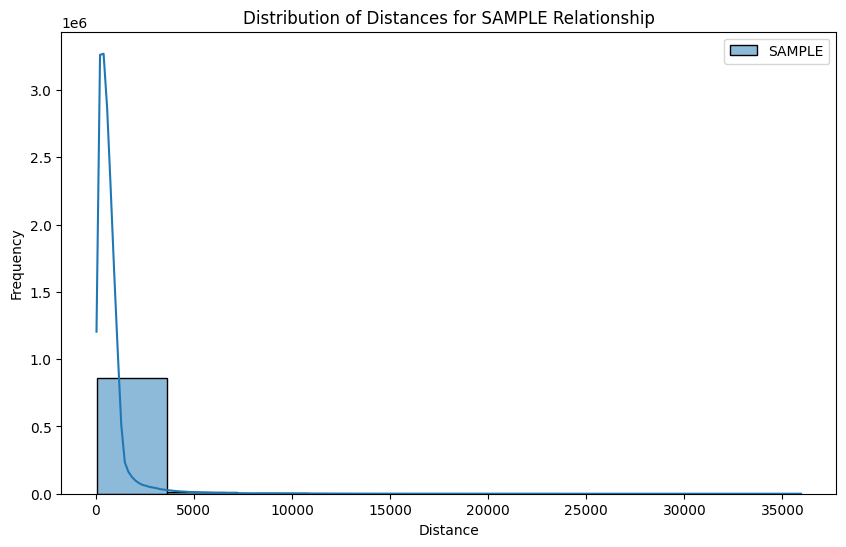

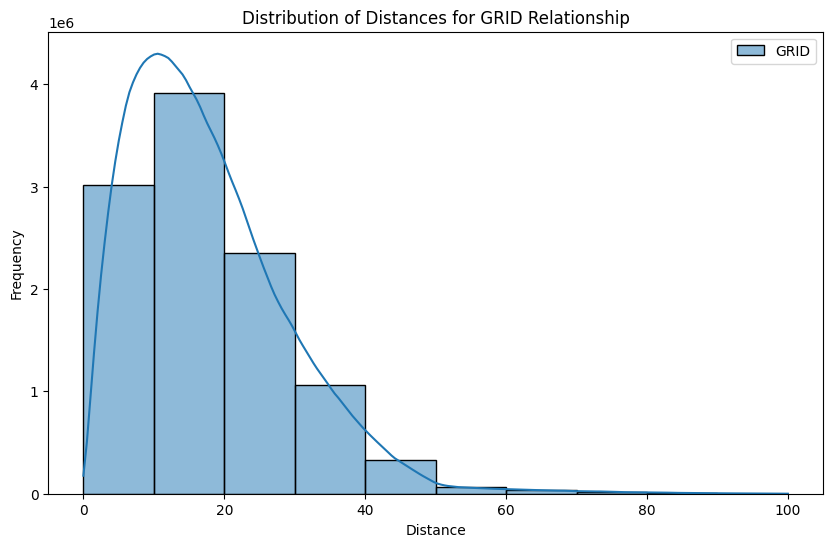

C:\Users\stang\AppData\Local\Temp\ipykernel_9352\2862616078.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['DIST'] = 1 - scaler.fit_transform(sample_data[['DIST']])
C:\Users\stang\AppData\Local\Temp\ipykernel_9352\2862616078.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_data['DIST'] = 1 -scaler.fit_transform(grid_data[['DIST']])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sample_data = graph_df[graph_df['LINK:TYPE'] == 'SAMPLE']
grid_data = graph_df[graph_df['LINK:TYPE'] == 'GRID']

# Plot histogram for SAMPLE relationship
plt.figure(figsize=(10, 6))
sns.histplot(sample_data["DIST"], bins=10, kde=True, label="SAMPLE")
plt.title("Distribution of Distances for SAMPLE Relationship")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot histogram for GRID relationship
plt.figure(figsize=(10, 6))
sns.histplot(grid_data["DIST"], bins=10, kde=True, label="GRID")
plt.title("Distribution of Distances for GRID Relationship")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

scaler = MinMaxScaler()

sample_data['DIST'] = 1 - scaler.fit_transform(sample_data[['DIST']])
grid_data['DIST'] = 1 -scaler.fit_transform(grid_data[['DIST']])

scaled_df = pd.concat([sample_data, grid_data])

In [ ]:
scaled_df.rename(columns={'DIST':'DIST:float'}, inplace=True)

In [ ]:
scaled_df

,index,:START_ID,:END_ID,LINK:TYPE,DIST:float
1,389,96,182,SAMPLE,0.999143
2,389,96,252,SAMPLE,0.997863
3,389,96,317,SAMPLE,0.996246
4,389,96,433,SAMPLE,0.993957
5,389,96,605,SAMPLE,0.991194
...,...,...,...,...,...
11784019,6958391,5411058,5409021,GRID,0.692258
11784023,6925718,5385417,5399745,GRID,0.679330
11784024,6944148,5399745,5385417,GRID,0.679330
11784050,7076898,5503195,5833080,GRID,0.626354


In [ ]:
scaled_df.to_csv("../../data/graph_2_2/relationships.csv", index=False)

Finally, we clean and rename columsn in our main node dataframe to get it ready for neo4j

In [ ]:
peak_df

,index,SpecID,WaveNumber,Status,Absorbance,Widths,Prominences,GridSlot,Node_ID
96,389,201210-1-00,465.83142,Normal,54.866643,72.606738,47.322760,"(18, 1)",96
182,475,201210-1-00,524.60138,Normal,27.249634,20.976130,8.277837,"(20, 0)",182
252,545,201210-1-00,572.43738,Normal,24.281960,10.377739,6.875839,"(22, 0)",252
317,610,201210-1-00,616.85651,Normal,130.660198,55.638128,127.961246,"(24, 2)",317
433,726,201210-1-00,696.12756,Normal,155.171518,44.976049,156.359133,"(27, 3)",433
...,...,...,...,...,...,...,...,...,...
6228219,8009366,210526-3-49,1294.07740,Hyperglycemia,32.159583,17.020556,6.197960,"(51, 0)",6228219
6228348,8009495,210526-3-49,1382.23230,Hyperglycemia,30.246198,30.420556,12.254316,"(55, 0)",6228348
6228439,8009586,210526-3-49,1444.41920,Hyperglycemia,33.353996,133.141146,32.856307,"(57, 0)",6228439
6228504,8009651,210526-3-49,1488.83830,Hyperglycemia,10.608297,23.892630,9.838491,"(59, 0)",6228504


In [ ]:
peak_df.rename(columns={"Status":"Status:LABEL"}, inplace=True)

In [ ]:
peak_df.rename(columns={'WaveNumber':'WaveNumber:float', 'Absorbance':'Absorbance:float', 'Widths':'Widths:float', 'Prominences':'Prominences:float', 'Node_ID':'Node_ID:ID'}, inplace=True)

In [ ]:
peak_df.to_csv('../../data/graph_2_2/nodes.csv', index=False)